# Example Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

In [2]:
os.chdir('../')

In [3]:
from portfolio import Portfolio
import estimation as est
import optimization as opt
import plotting

## 1. Loading Data and Setup
- We first load the data using the `Portfolio` class and it's associated method `get_prices`. The analysis is restricted by a period required to be set by `set_period`. 

In [4]:
securities_big = ['SPY', 'BND', 'GLD', '^RUT']
pf1 = Portfolio(securities_big)
pf1.set_period(('2018-01-01', '2021-05-28'))
pf1.get_prices('daily')
pf1.set_benchmark('SPY')

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


- Then we set the constraints using `set_constraints` and conduct a historical backtest. This will store backtest results in the `Portfolio` class based on the frequency of the rebalance (in trading days), it's estimation period (in trading days) and the model selected in the `models: list`.

In [5]:
pf1.set_constraints(None, True)
pf1.historical_backtest(models=['EW', 'GMV', 'RP'], frequency=22, estimation_period = 252)

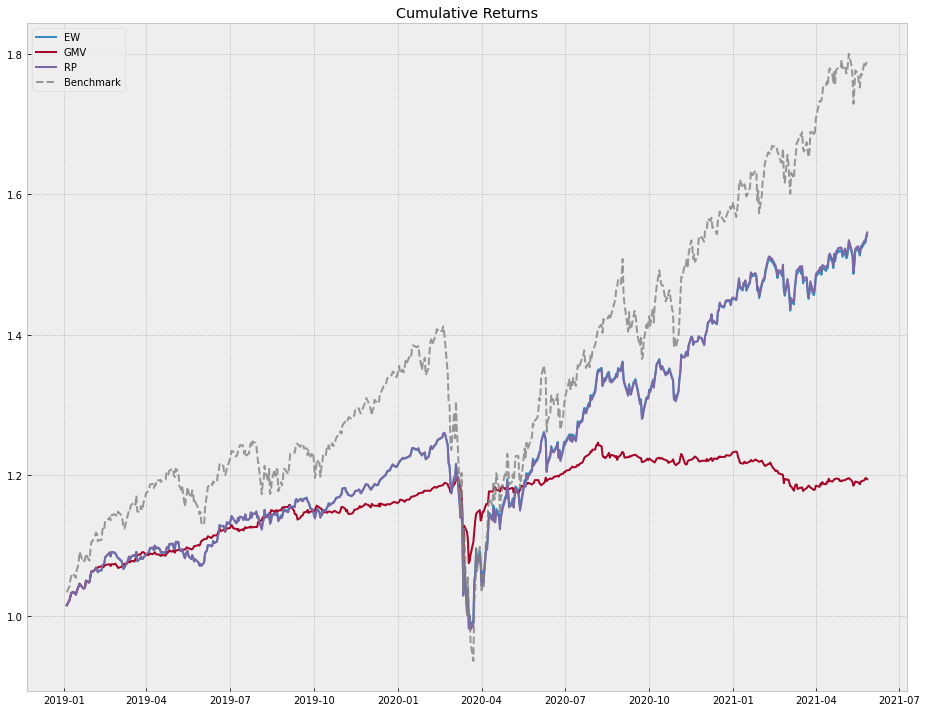

In [6]:
pf1.get_backtest_report()

In [7]:
weights = {}
for mod in pf1.weighting_models:
    if mod != 'EW':
        weights[mod] = pd.DataFrame(np.concatenate(pf1.backtest[mod]['weights'],axis =1).T,
                                    columns = pf1.securities)

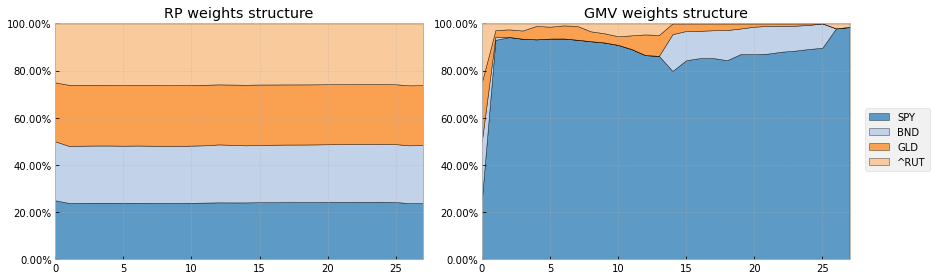

In [9]:
num_rows = int(np.ceil((len(pf1.weighting_models)-1)/2))
fig, axes = plt.subplots(num_rows,2)
fig.set_figheight(4*num_rows)
fig.set_figwidth(12)

# plotting.plot_stacked_weights(weights['RP'],'RP',ax = axes[0])
# plotting.plot_stacked_weights(weights['GMV'],'GMV', ax = axes[1])

fig.legend(weights['RP'].columns.to_list(), loc = 'center left', bbox_to_anchor=(1, 0.5))